# Chapter 4 - Inferences with Gaussians

In [1]:
import pyjags
from pjbcmassistant import model_handler
from pjbcmassistant import sample_handler


## 4.1 - Inferring a mean and standard deviation

In [2]:
spec = """
model:
Gaussian.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [1.1, 1.9, 2.3, 1.8]
n = len(x) 

sample:
mu
sigma

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.definition())
samples = model.sample(**modelbuddy.sample_rules())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [3]:
samplebuddy.summary()

,mean,std dev,median,mode,HPD,95CI
mu,1.806481,0.614671,1.788435,-2.418700,"[-0.252, 2.945]","[0.707, 3.005]"
sigma,0.981085,0.840711,0.725024,3.043786,"[0.224, 4.233]","[0.316, 3.674]"


/home/isaiah/anaconda3/envs/pyjagsBCM/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


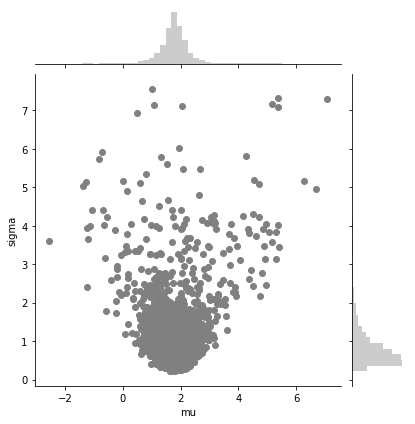

In [4]:
samplebuddy.vizjoint('mu','sigma')

## 4.2 - The Seven Scientists

In [5]:
spec = """
model:
SevenScientists.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [-27.020,3.570,8.191,9.898,9.603,9.945,10.056]
n = len(x)

sample:
mu
sigma

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.definition())
samples = model.sample(**modelbuddy.sample_rules())

samplebuddy = sample_handler(samples)

sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [6]:
samplebuddy.summary()

,mean,std dev,median,mode,HPD,95CI
mu,9.886952,0.434111,9.925179,-7.858077,"[9.548, 10.118]","[9.552, 10.103]"
sigma_0,292.816348,2878.287608,54.835799,10366.392478,"[8.854, 663.014]","[15.983, 1158.824]"
sigma_1,49.612032,375.077443,9.452419,1496.537089,"[1.785, 112.508]","[2.771, 259.176]"
sigma_2,9.034791,47.807675,2.476210,255.898282,"[0.051, 26.583]","[0.747, 52.811]"
sigma_3,1.106279,17.413740,0.149521,40.319290,"[0.015, 2.702]","[0.028, 4.184]"
sigma_4,2.118839,24.494800,0.459017,101.427275,"[0.016, 5.981]","[0.054, 9.7]"
sigma_5,2.320891,87.645418,0.136990,119.893218,"[0.014, 4.809]","[0.027, 3.973]"
sigma_6,1.553695,18.860936,0.218432,69.613328,"[0.014, 3.726]","[0.035, 7.197]"


## 4.3 - Repeated measurement of IQ

In [7]:
spec = """
model:
IQ.txt

settings:
chains = 3
samples = 100000
thinning = 0
burnin = 1000

data:
x = [[90,95,100],[105,110,115],[150,155,160]]
n, m = np.shape(x)

# this is an ugly way to do this, because we're "calling" a
# module (numpy) that we haven't actually imported... I'm sure there's
# a smart alternative, but I won't dwell on it just yet.

sample:
mu
sigma

"""

modelbuddy = model_handler(spec)

# modelbuddy.data['x'] = [[90,95,100],[105,110,115],[150,155,160]]

model = pyjags.Model(**modelbuddy.definition())
samples = model.sample(**modelbuddy.sample_rules())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 300000 of 300000, elapsed 0:00:02, remaining 0:00:00


In [8]:
samplebuddy.summary()

,mean,std dev,median,mode,HPD,95CI
mu_0,94.996151,4.078984,94.999499,52.987433,"[86.879, 103.279]","[86.854, 103.168]"
mu_1,109.973078,4.094289,109.984557,62.092250,"[101.554, 118.174]","[101.731, 118.073]"
mu_2,155.002790,4.083260,155.004239,112.381824,"[146.696, 163.146]","[146.873, 163.17]"
sigma,6.523134,2.709232,5.881324,37.998952,"[2.943, 11.742]","[3.428, 13.445]"
